<a href="https://colab.research.google.com/github/RahulDogra-92/Machine-Learning-Scientist/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Boston housing data

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
boston = pd.read_csv('Boston.csv')
print(boston.head())

      CRIM    ZN  INDUS  CHAS     NX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [216]:
boston.shape

(506, 14)

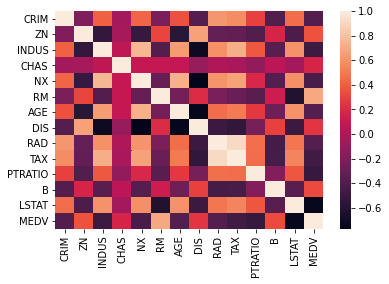

In [217]:
sns.heatmap(boston.corr());

#Creating feature and target arrays


In [218]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

In [219]:
print(X.ndim, y.ndim)
print(X.shape, y.shape)

2 1
(506, 13) (506,)


#Predicting house value from a single feature

In [220]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [221]:
print(X_rooms.ndim, y.ndim)
print(X_rooms.shape, y.shape)

1 1
(506,) (506,)


In [222]:
print(X_rooms.ndim, y.ndim)
print(X_rooms.shape, y.shape)

1 1
(506,) (506,)


In [223]:
y = y.reshape(-1, 1) #Now trying to reshape with (-1, 1) . We have provided column as 1 but rows as unknown
X_rooms = X_rooms.reshape(-1, 1)

In [224]:
print(X_rooms.ndim, y.ndim)
print(X_rooms.shape, y.shape)

2 2
(506, 1) (506, 1)


#Plotting house value vs. number of rooms

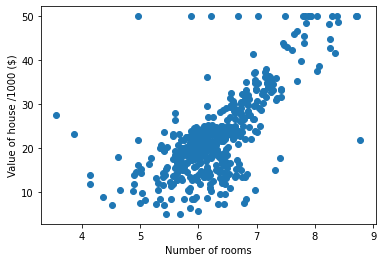

In [225]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

#Fitting a regression model

In [226]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1, 1)

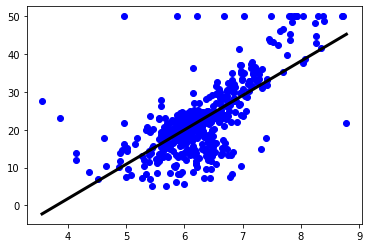

In [227]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.show()

#Linear regression on all features

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7112260057484925

In [229]:
from sklearn.metrics import mean_squared_error
# Compute and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

4.638689926172827

#Cross-validation in scikit-learn

In [230]:
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [232]:
np.mean(cv_results)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))


Average 5-Fold CV Score: 0.35327592439587685


#Ridge regression in scikit-learn

In [233]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127309

#Lasso regression in scikit-learn

In [234]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True) #all variables are on same scale
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test) 
lasso.score(X_test, y_test)

0.5950229535328551

#Lasso regression for feature selection

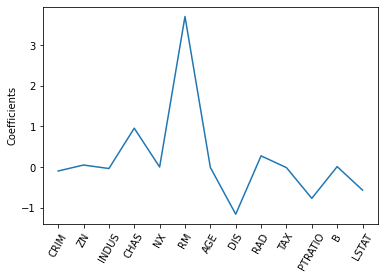

In [235]:
from sklearn.linear_model import Lasso 
names = boston.drop('MEDV', axis=1).columns 
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients') 
plt.show()